In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_9758/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Assignment 3 - Data Science-Related Software Product

#### Melissa Niemandt - 21011127
#### Rachel Bell - 20019755
#### Staci Mansell

## Project brief

The group has decided to implement a Gram stain image classifier.

For the project the following development process was used to plan, implement and deploy the product. 

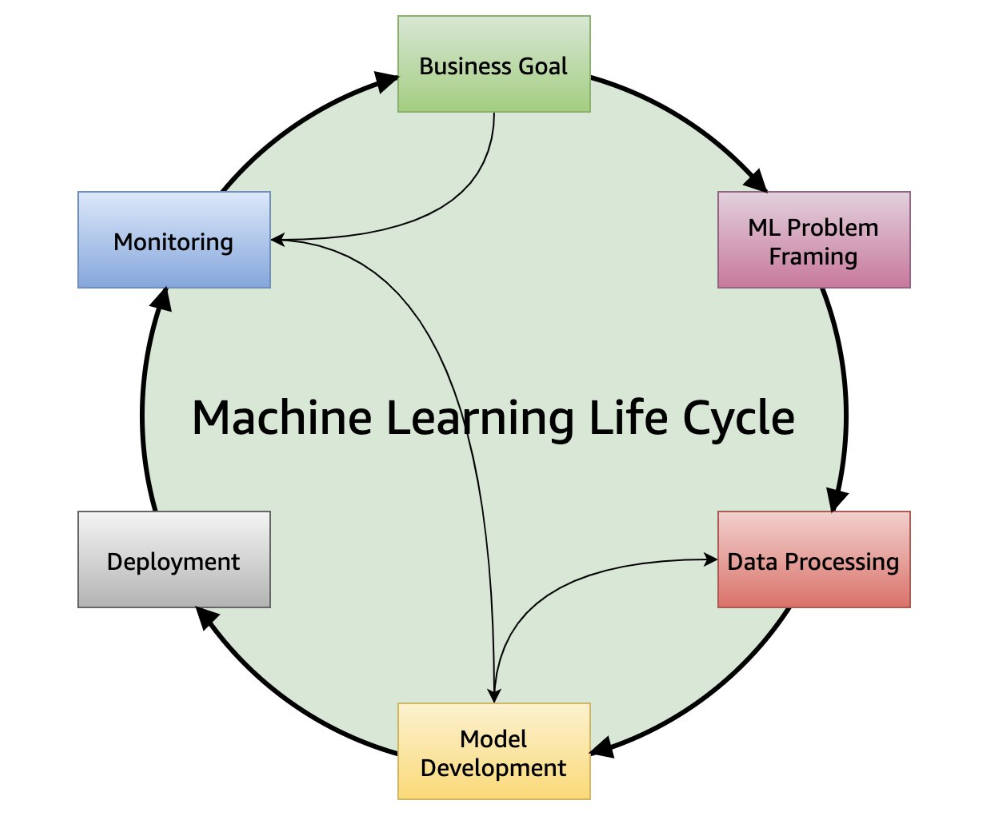

## Use of AWS Services

The whole solution was implemented on AWS. The group made a Free tier account and developed the solution on AWS using a JupyterLab Notebook instance. 

The solution makes use of services such as Amazon S3. The model development steps were implemented through APIs, which in turn facillicated deployment. An Autopilot job was also implemented to compare with the other model's identified in development.

## Identify the Business Goal

In short, fast and accurate classification of bacteria in samples are critical for timely disease diagnosis and treatment. The current gold standard diagnostic method of manual microscopic interpretation of Gram stains is time consuming and operator dependent, the aim of this project is to develop an image classifier capable of classifying bacteria in a Gram stain. The final product is intended to augment the scientist's expertise to make Gram stain results more accurate. 

**Background Information**

Gram stains are a very useful tool in the diagnostic toolbox for medical laboratory staff and clinicians. It gives scientists the ability to provide clinicians with preliminary results to ensure patients are on appropriate antibiotics. 

For the purposes of this assignment, we will only consider Blood Culture Gram stains in terms of the business goal, machine learning problem and implementation. But it is worth noting that Gram stains are performed on a variety of specimens in various parts of the diagnostic process, meaning the solution could applied in many different parts of the diagnostic process. 

**Blood cultures - what are they and why do they matter?**

Blood cultures are performed to detect bacteria and yeast in a patient's blood stream. Blood cultures are drawn into 2 bottles, one facilitates aerobic growth and the other anaerobic growth. This covers majority of pathogens expected in a blood stream infections. Blood stream infections happen when a patient has a local infection that their immune system can't contain, the infection spreads from the initial site into the blood stream and becomes life threatening very quickly. Thus, it becomes a time critical test to ensure the antibiotic treatment covers the bacteria causing the infection. Unfortunately, everything in Microbiology takes time. In order to identify bacteria, we need to culture them (which can take anywhere from 18 - 36 hours) and a further 24 hours (minimum) to report antimicrobial susceptibility testing. This means that any early indication of the potential identification of the organism in question is paramount to ensure the patient is on the correct antibiotic treatment. This is where a Gram stain results is very important in guiding a clinicians which antibiotics may be appropriate for the patient.

Once the bottles are collected, there are sent to the laboratory for incubation. The bottles are incubated in a machine that incubates the bottle at 35 degrees and reads each bottle every 15 minutes, if bacterial growth is detected, the machine flags positive and a scientist performs an immediate Gram stain. Depending on the organism, the bottles could flag as early as 6 hours after incubation. 

**Gram stains** 


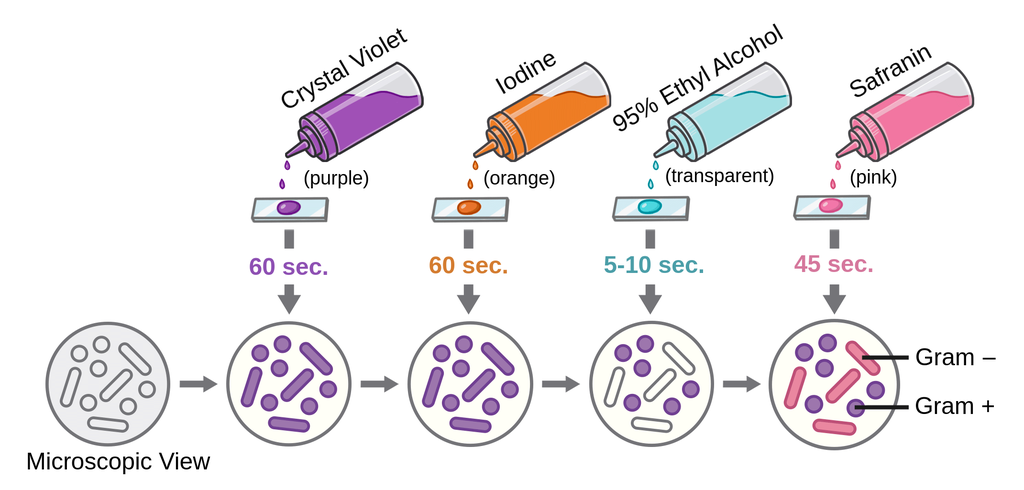



The result means that scientists can classify bacteria based on the colour into the 2 major groups of bacteria, Gram positive bacteria and Gram negative bacteria. Each class can be further split into sub categories based on the shape of the cells.

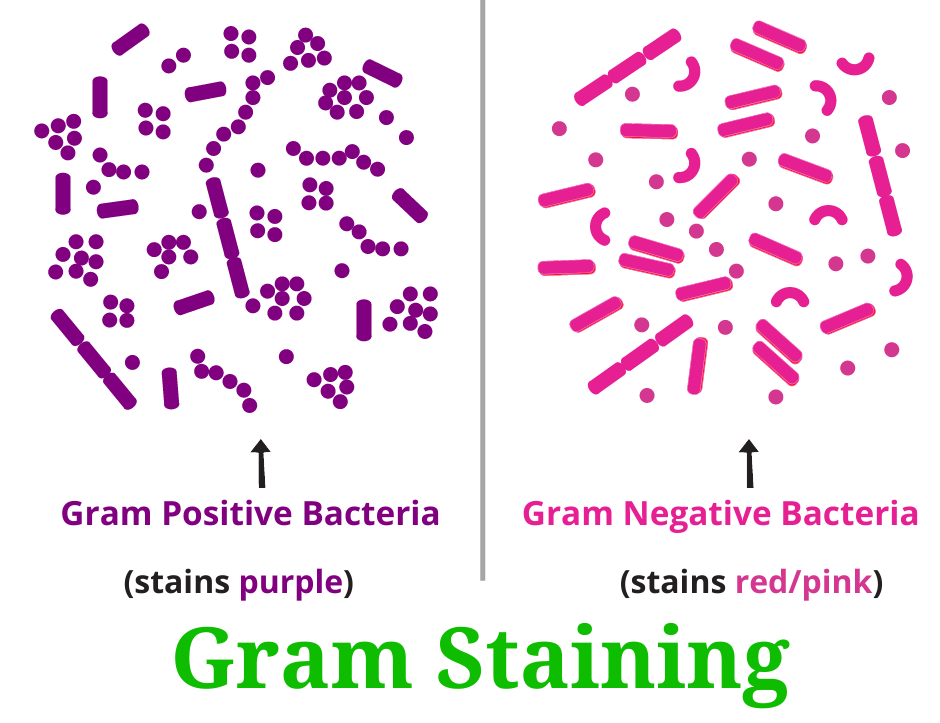

**The business problem**

It's not always easy for scientists to report what they see as the process is manual and operator dependent, bacteria don't always look like the pictures! This can be especially challenging for scientists who don't have a lot of Microbiology experience, such as staff working in smaller satelite labs or ones still in training. 

That means, you could see: 
 
 <table>
  <tr>
    <td>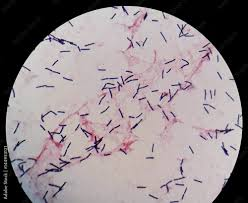</td>
    <td>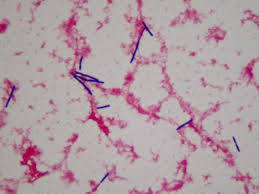</td>
    <td>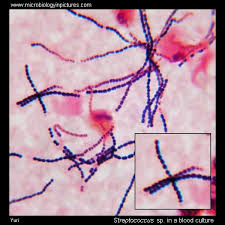</td>
  </tr>
  <tr>
    <td>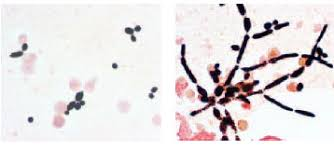</td>
    <td>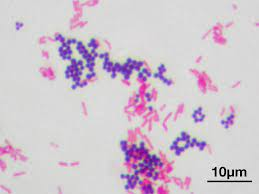</td>
    <td>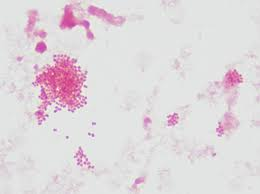</td>
  </tr>
</table>

 
 

## Frame the Machine Learning Problem

The machine learning problem is simple. The team is aiming to build an image classifier model to classify Gram stain images into Gram positive and Gram negative groups.

The implementation is challenging, almost all of the images are from a database of real clinican samples. This means the images are not perfect and have significant background interference and different microscope settings. The other challenging aspect to this problem is that computer vision is a very complex domain and processing the images before actually building a model is a complex and time consuming task.

While this is not exactly a novel idea, there are many journal articles describing how this technology has been implemented in an academic level. This kind of technology is not currently in use in laboratories in New Zealand, mainly due to cost and the fact that scientists think they can do it better. However, the group wanted to do something different to what was covered in the other assignments and what was covered in the tutorials to see how well we could implement this kind of model. 

## Process Data

The data set was obtained from: https://heibox.uni-heidelberg.de/d/6b672e3ff50a468191b9/?p=%2F&mode=list

Credit: Institute for Clinical Chemistry and Institute of Medical Microbiology and Hygiene, Medical Faculty Mannheim of Heidelberg University.

The institution has made the image files publicly available. 

<Table with sample images>...
    

## Develop Model

In [151]:
!pip install sagemaker ipywidgets --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autovizwidget 0.20.5 requires pandas<2.0.0,>=0.20.1, but you have pandas 2.0.3 which is incompatible.
hdijupyterutils 0.20.5 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.0.3 which is incompatible.
sparkmagic 0.20.5 requires nest-asyncio==1.5.5, but you have nest-asyncio 1.5.6 which is incompatible.
sparkmagic 0.20.5 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.0.3 which is incompatible.


#### Pre-trained TensorFlow Image Classification Model

In order to experiment further with image classification models, we decided to use one of the pre-trianed models for the TensorFlow Hub. There are many different options to consider when using pretrained models, the 3 models we considered: 

1. Inception (A common pre-trained model used in the medical fiels)
2. ResNet
3. MobileNet (Designed to be deployed on resource contrained devices)

A comprehensive list of TensorFLow Hub Models can be found here: https://docs.aws.amazon.com/sagemaker/latest/dg/IC-TF-Models.html

In the end, we decided to go with MobileNet, mainly because we don't have a massive amount of computational power. THe specific model used is:  MobileNet V2 1.00 224 

**MobileNet V2 1.00 224**

This is a pre-trained model that was constructed with ImageNet, which contains 1.2 million nature images and 1000 image classes. The last layer in this model is retrained with the training image dataset instead of constructing the entire model scratch. This approach is called transfer learning, as it reuses precomputed model parameters. This approach is particularly advantageous in our case as it reduces the computational costs of training a model. 

Additionally, transfer learning can be further improved with fine-tuning along with modifying the last layer.



**1. Set up:** 

AWS services need to be set up and authenticated

In [152]:
import sagemaker, boto3, json
from sagemaker.session import Session

sagemaker_session = Session()
aws_role = sagemaker_session.get_caller_identity_arn()
aws_region = boto3.Session().region_name
sess = sagemaker.Session()

**2. Selecting the pre-trained model:**

In [153]:
model_id, model_version = "tensorflow-ic-imagenet-mobilenet-v2-100-224-classification-4", "*"

**3. Fine-tune the pre-trained model on our training dataset:** 

The model attaches a classification layer to the corresponding feature extractor model available on TensorFlow/PyTorch Hub, and initialised the layer parameters to random values. The output dimension of the classification layer is determined based on the number classes in the input dataset.

The fine-tuning steps tunes the model parameters with the objective of minimising the classification error on the input data. 

First we retrieve the training docer container, the training algorithm source, the pre-trained base model, and a Python dictionary of the training hyper-parameters that the algorithm accepts with their default values.

In [155]:
from sagemaker import image_uris, model_uris, script_uris, hyperparameters

training_instance_type = "ml.m5.2xlarge"

# Retrieve the docker image
train_image_uri = image_uris.retrieve(
    region=None,
    framework=None,
    model_id=model_id,
    model_version=model_version,
    image_scope="training",
    instance_type=training_instance_type,
)
# Retrieve the training script
train_source_uri = script_uris.retrieve(
    model_id=model_id, model_version=model_version, script_scope="training"
)
# Retrieve the pre-trained model to further fine-tune
train_model_uri = model_uris.retrieve(
    model_id=model_id, model_version=model_version, model_scope="training"
)

We can now set the training parameters, the `sageMaker.estimator.Estimator` object launches the training job. The two parameters that need to be set before training: 

1. Parameters for the training job
    - Training data path (S3 bucket and folder where the training data are stored)
    - Output path (S3 bucket and folder where the training data are stored)
    - Training instance type (indicates the type of machine on which to run the training, typically GPU is used)
    
2. Algorithm specific training hyper-parameters

In [156]:
# Training data is available in this bucket
training_data_bucket = "158333-gp4"
training_data_prefix = "train"

training_dataset_s3_path = f"s3://{training_data_bucket}/{training_data_prefix}"

output_bucket = sess.default_bucket()
output_prefix = "MobileNet-1"

s3_output_location = f"s3://{output_bucket}/{output_prefix}/output"

Now we retrieve the python dictionary of training hyper-parameters that the algorithm accepts, these can be overridden on a case-by-case basis. 

In [158]:
from sagemaker import hyperparameters

# Retrieve the default hyper-parameters for fine-tuning the model
hyperparameters = hyperparameters.retrieve_default(model_id=model_id, model_version=model_version)

# Override default hyperparameters with custom values
hyperparameters["epochs"] = "5"
print(hyperparameters)

{'train_only_top_layer': 'True', 'epochs': '5', 'batch_size': '32', 'optimizer': 'adam', 'learning_rate': '0.001', 'beta_1': '0.9', 'beta_2': '0.999', 'momentum': '0.9', 'epsilon': '1e-07', 'rho': '0.95', 'initial_accumulator_value': '0.1', 'reinitialize_top_layer': 'Auto', 'early_stopping': 'False', 'early_stopping_patience': '5', 'early_stopping_min_delta': '0.0', 'dropout_rate': '0.2', 'regularizers_l2': '0.0001', 'label_smoothing': '0.1', 'image_resize_interpolation': 'bilinear', 'augmentation': 'False', 'augmentation_random_flip': 'horizontal_and_vertical', 'augmentation_random_rotation': '0.2', 'augmentation_random_zoom': '0.1', 'binary_mode': 'False', 'eval_metric': 'accuracy', 'validation_split_ratio': '0.2', 'random_seed': '123'}


We can set a hyperparameter tuning job by creating a `HyperparameterTuner` instance 

In [159]:
from sagemaker.tuner import ContinuousParameter

# Use AMT for tuning and selecting the best model
use_amt = False

# Define objective metric per framework, based on which the best model will be selected.
amt_metric_definitions = {
    "metrics": [{"Name": "val_accuracy", "Regex": "val_accuracy: ([0-9\\.]+)"}],
    "type": "Maximize",
}

# Select from the hyperparameters supported by the model
hyperparameter_ranges = {
    "adam-learning-rate": ContinuousParameter(0.0001, 0.1, scaling_type="Logarithmic")
}

# Increase the total number of training jobs run by AMT, for increased accuracy (and training time).
max_jobs = 6

# Change parallel training jobs run by AMT to reduce total training time, constrained by your account limits.
# if max_jobs=max_parallel_jobs then Bayesian search turns to Random.
max_parallel_jobs = 2

Start training:

In [160]:
from sagemaker.estimator import Estimator
from sagemaker.utils import name_from_base
from sagemaker.tuner import HyperparameterTuner

training_job_name = name_from_base(f"Gram-stain-{model_id}-transfer-learning")

training_metric_definitions = [
    {"Name": "val_accuracy", "Regex": "val_accuracy: ([0-9\\.]+)"},
    {"Name": "val_loss", "Regex": "val_loss: ([0-9\\.]+)"},
    {"Name": "train_accuracy", "Regex": "- accuracy: ([0-9\\.]+)"},
    {"Name": "train_loss", "Regex": "- loss: ([0-9\\.]+)"},
]

# Create SageMaker Estimator instance
ic_estimator = Estimator(
    role=aws_role,
    image_uri=train_image_uri,
    source_dir=train_source_uri,
    model_uri=train_model_uri,
    entry_point="transfer_learning.py",
    instance_count=1,
    instance_type=training_instance_type,
    max_run=360000,
    hyperparameters=hyperparameters,
    output_path=s3_output_location,
    base_job_name=training_job_name,
    metric_definitions=training_metric_definitions,
)

if use_amt:
    hp_tuner = HyperparameterTuner(
        ic_estimator,
        amt_metric_definitions["metrics"][0]["Name"],
        hyperparameter_ranges,
        amt_metric_definitions["metrics"],
        max_jobs=max_jobs,
        max_parallel_jobs=max_parallel_jobs,
        objective_type=amt_metric_definitions["type"],
        base_tuning_job_name=training_job_name,
    )

    # Launch a SageMaker Tuning job to search for the best hyperparameters
    hp_tuner.fit({"training": training_dataset_s3_path})
else:
    # Launch a SageMaker Training job by passing s3 path of the training data
    ic_estimator.fit({"training": training_dataset_s3_path}, logs=True)

NOTEBOOK_METADATA_FILE detected but failed to get valid domain and user from it.
INFO:sagemaker:Creating training-job with name: Gram-stain-tensorflow-ic-imagenet-mobil-2023-10-15-03-02-16-690


2023-10-15 03:02:16 Starting - Starting the training job...
2023-10-15 03:02:31 Starting - Preparing the instances for training......
2023-10-15 03:03:29 Downloading - Downloading input data...............
2023-10-15 03:06:10 Training - Training image download completed. Training in progress..2023-10-15 03:06:11.627090: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-10-15 03:06:11.627243: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2023-10-15 03:06:11.653244: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-10-15 03:06:13,736 sagemaker-training-toolkit INFO     Imported framework sagemaker_tensorflow_container.training
2023-10-15 03:06:13,748 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-10

Judging by the output, the validation accuracy for the best model was 0.81. Thats a good result in terms of the difficulty of the images to be classified and the minimal operator input for the job. The job took about 14 minutes to run, with about 12,000 training images. 

The HPO training job validation accuracy:

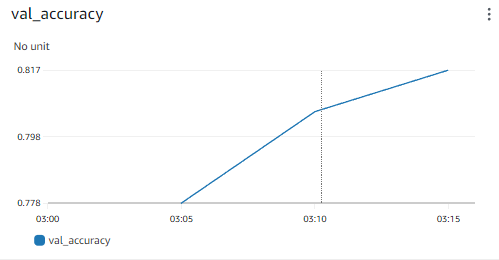

This plot was taken from the training job dashboard and shows the improving validation accuracy as the hyperparameter job is completed.

The HPO training job training accuracy:

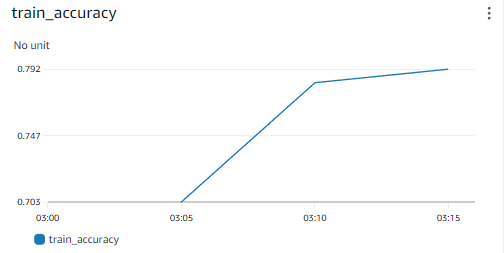

Simlar to the validation accuracy, the training accuracy also improved during the hyperparameter tuning job.

**4. Model deployment**

In [164]:
inference_instance_type = "ml.m5.2xlarge"

# Retrieve the inference docker container uri
deploy_image_uri = image_uris.retrieve(
    region=None,
    framework=None,
    image_scope="inference",
    model_id=model_id,
    model_version=model_version,
    instance_type=inference_instance_type,
)
# Retrieve the inference script uri
deploy_source_uri = script_uris.retrieve(
    model_id=model_id, model_version=model_version, script_scope="inference"
)

endpoint_name = name_from_base(f"jumpstart-example-FT-{model_id}-")

# Use the estimator from the previous step to deploy to a SageMaker endpoint
finetuned_predictor = (hp_tuner if use_amt else ic_estimator).deploy(
    initial_instance_count=1,
    instance_type=inference_instance_type,
    entry_point="inference.py",
    image_uri=deploy_image_uri,
    source_dir=deploy_source_uri,
    endpoint_name=endpoint_name,
)

INFO:sagemaker.image_uris:Ignoring unnecessary Python version: py39.
INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-691145764389/MobileNet-1/output/Gram-stain-tensorflow-ic-imagenet-mobil-2023-10-15-03-02-16-690/output/model.tar.gz), script artifact (s3://jumpstart-cache-prod-us-east-1/source-directory-tarballs/tensorflow/inference/ic/v2.0.3/sourcedir.tar.gz), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-691145764389/sagemaker-jumpstart-2023-10-15-03-33-25-878/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: sagemaker-jumpstart-2023-10-15-03-33-25-878
INFO:sagemaker:Creating endpoint-config with name jumpstart-example-FT-tensorflow-ic-imag-2023-10-15-03-33-25-878
INFO:sagemaker:Creating endpoint with name jumpstart-example-FT-tensorflow-ic-imag-2023-10-15-03-33-25-878


----!

**5. Testing the trained model**

In [192]:
import boto3
import os
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Create a SageMaker runtime client
runtime_client = boto3.client("sagemaker-runtime")

# Iterate over the test images in the S3 bucket
test_bucket = "158333-gp4"
test_prefix = "test/"

response = s3_client.list_objects_v2(Bucket=test_bucket, Prefix=test_prefix, Delimiter='/')
labels = [common_prefix['Prefix'].split('/')[-2] for common_prefix in response['CommonPrefixes']]

predicted_labels = []
probabilities=[]
true_labels = []
class_labels = ["GN", "GP"]

def make_prediction(image_path):
    local_image_path = '/tmp/' + os.path.basename(image_path)
    
    # Download the image file from S3
    s3_client.download_file(test_bucket, image_path, local_image_path)

    with open(local_image_path, 'rb') as f:
        image_data = f.read()

    response = runtime_client.invoke_endpoint(
        EndpointName=endpoint_name,
        Body=image_data,
        ContentType='application/x-image'
    )
    # Extract the predicted label from the response
    predicted_probabilities = json.loads(response['Body'].read().decode())
    predicted_probabilities = np.array(predicted_probabilities)
    predicted_label = class_labels[predicted_probabilities.argmax()]
    
    return predicted_labels, predicted_probabilities


for label in labels:
    label_prefix = test_prefix + label + '/'
    response = s3_client.list_objects_v2(Bucket=test_bucket, Prefix=label_prefix)

    for obj in response['Contents']:
        # Get the image file path
        image_path = obj['Key']

        # Make predictions on the image using the deployed endpoint
        predicted_label, probability = make_prediction(image_path)

        # Append the predicted label and true label to the respective lists
        probabilities.append(probability)
        predicted_labels.append(predicted_label)
        true_labels.append(label)



    



In [207]:
def get_predicted_labels(probabilities):
    class_labels = ["GN", "GP"]
    predicted_labels = []

    for prob in probabilities:
        # Extract the probabilities from the array object
        prob_values = prob.item()['probabilities']
        
        # Find the index of the maximum probability
        max_index = np.argmax(prob_values)
        
        # Map the index to the corresponding class label
        predicted_label = class_labels[max_index]
        
        # Add the predicted label to the list
        predicted_labels.append(predicted_label)
    
    return predicted_labels



In [209]:
predicted_labels = get_predicted_labels(probabilities)

In [210]:
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')



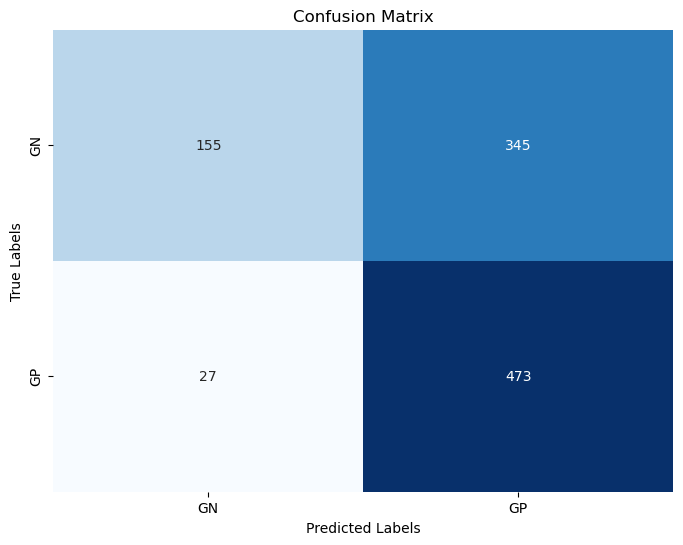

Accuracy: 0.628


In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap plot of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

print("Accuracy:", accuracy)

In [218]:
# Delete the SageMaker endpoint and the attached resources
finetuned_predictor.delete_model()
finetuned_predictor.delete_endpoint()

INFO:sagemaker:Deleting model with name: sagemaker-jumpstart-2023-10-15-03-33-25-878
INFO:sagemaker:Deleting endpoint configuration with name: jumpstart-example-FT-tensorflow-ic-imag-2023-10-15-03-33-25-878
INFO:sagemaker:Deleting endpoint with name: jumpstart-example-FT-tensorflow-ic-imag-2023-10-15-03-33-25-878


## Autopilot model

Let's look at an autopilot model, to see what the outcome is and what that recommends. I've decided to only use the test data set, which contains 1000 images. 500 are Gram positive and 500 are Gram negative. 

The images have been uploaded into an S3 bucket using the S3 Management Console, mainly because the train dataset took about 16 hours to upload. It was therefore split into uploading the Gram negative images images first, then the Gram positive images. 

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from urllib.parse import urlparse
import time

In [241]:
import sagemaker
import boto3
from sagemaker import get_execution_role

#set up the region
region = boto3.Session().region_name

session = sagemaker.Session()

# You can modify the following to use a bucket of your choosing
bucket = "158333-gp4"
prefix = "sagemaker/autopilot-Gram-classifier-2"

role = get_execution_role()

# This is the client we will use to interact with SageMaker Autopilot
sm = boto3.Session().client(service_name="sagemaker", region_name=region)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [242]:
bucket

'158333-gp4'

1. Create the Autopilot experiment in Amazon Sagemaker. Also specify the training datasest location and the S3 bucket where Autopilot saves the output data.

In [243]:
# Step 1: Create an Autopilot experiment in Amazon SageMaker
sagemaker_client = boto3.client('sagemaker')

# S3 bucket created in the console, the images were uploaded via the S3 console
s3_bucket = '158333-gp4'
s3_prefix = 'test'

create_experiment_response = sagemaker_client.create_experiment(
    ExperimentName='Autopilot-image-classification-experiment-2',
    DisplayName='Gram-stain-Image-Classification-Experiment-2'
)

experiment_arn = create_experiment_response['ExperimentArn']


2. The images are already stored in an S3 bucket as specified in the code above. 

3. Defining the problem type: Autopilot automatically generates candidate definitions for the experiment. 

4. Running the Autopilot job.

In [247]:
# Step 4: Run the Autopilot job
create_auto_ml_job_response = sagemaker_client.create_auto_ml_job_v2(
    AutoMLJobName='Gram-image-classification-job-2',
    AutoMLJobInputDataConfig=[
        {
            'DataSource': {
                'S3DataSource': {
                    'S3DataType': 'S3Prefix',
                    'S3Uri': f's3://{s3_bucket}/{s3_prefix}'
                }
            }
        },
    ],
    AutoMLProblemTypeConfig={
        'ImageClassificationJobConfig': {
            'CompletionCriteria': {
                'MaxCandidates': 1,
                'MaxAutoMLJobRuntimeInSeconds': 3600
            }
        },
    },
    OutputDataConfig={
        'S3OutputPath': f's3://{s3_bucket}/autopilot-output'
    },
    ModelDeployConfig={ 
      "EndpointName": "Gram-Image-Classifier"
   },
    RoleArn='arn:aws:iam::691145764389:role/service-role/AmazonSageMaker-ExecutionRole-20231010T114626' ,
    AutoMLJobObjective={
        'MetricName': 'Accuracy'
    },
    DataSplitConfig={
        'ValidationFraction': 0.2
    }
)

auto_ml_job_arn = create_auto_ml_job_response['AutoMLJobArn']


The model ran in about 20 minutes, so we can now look at the output notebooks and the best model metrics to see how successfull the job was.

In [106]:
import boto3
# Create a SageMaker client
sm = boto3.client('sagemaker')

auto_ml_job_name = 'Gram-image-classification-job'

response = sm.describe_auto_ml_job_v2 (AutoMLJobName=auto_ml_job_name)


We can now examine the best model selected by the Autopilot training job:

In [107]:
best_candidate = sm.describe_auto_ml_job_v2(AutoMLJobName=auto_ml_job_name)["BestCandidate"]
best_candidate_name = best_candidate["CandidateName"]

print("\n")
print("CandidateName: " + best_candidate_name)
print(
    "FinalAutoMLJobObjectiveMetricName: "
    + best_candidate["FinalAutoMLJobObjectiveMetric"]["MetricName"]
)
print(
    "FinalAutoMLJobObjectiveMetricValue: "
    + str(best_candidate["FinalAutoMLJobObjectiveMetric"]["Value"])
)




CandidateName: Gram-image-classification-job-trial-ModelTraining-1
FinalAutoMLJobObjectiveMetricName: Accuracy
FinalAutoMLJobObjectiveMetricValue: 0.9850000143051147


This result is actually really good. A 98% accuracy score in a model fit on 1000 images just confirms how powerful the AWS technology is, Autopilot is considered to be an automated Machine Learning, low code options and actually performs very well. 

Next, we can look at the nitty gritty details of the best model:

In [114]:
best_candidate

{'CandidateName': 'Gram-image-classification-job-trial-ModelTraining-1',
 'FinalAutoMLJobObjectiveMetric': {'Type': 'Maximize',
  'MetricName': 'Accuracy',
  'Value': 0.9850000143051147,
  'StandardMetricName': 'Accuracy'},
 'ObjectiveStatus': 'Succeeded',
 'CandidateSteps': [{'CandidateStepType': 'AWS::SageMaker::TrainingJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:691145764389:training-job/Gram-image-classification-job-ModelTraining-1-be5b3f936c504855b',
   'CandidateStepName': 'Gram-image-classification-job-ModelTraining-1-be5b3f936c504855b'}],
 'CandidateStatus': 'Completed',
 'InferenceContainers': [{'Image': '763104351884.dkr.ecr.us-east-1.amazonaws.com/autogluon-inference:0.6.1-gpu-py38-cu113-ubuntu20.04',
   'ModelDataUrl': 's3://158333-gp4/autopilot-output/Gram-image-classification-job/Gram-image-classification-job-ModelTraining-1-be5b3f936c504855b/output/model.tar.gz',
   'Environment': {'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'text/csv',
    'SAGEMAKER_INFERENCE

The Autopilot model is supposed to generate 2 reports, an explainability report and a model performance report. Unfortunately the model performance report did not generate properly (As seen in the summary above).

So the the only report here will be the Explainability of the model, the output generated are a series of images with a heatmap overlay and JSON file with some further details.

The explainability report includes: 

- `input_image_uri`: the Amazon S3 URI to the input image taken as the input for the heatmap.
- `heatmap_imae_uri`: the Amazon S3 URI to the heatmap image generated by Autopilot.
- `predicted_label`: the label class predicted by the best model trained by Autopilot.
- `probability`: the confidence with which the `predicted_label` is predicted

In [146]:
import json

# Load JSON data 
with open('report.json', 'r') as file:
    data = json.load(file)

# Extract the 'analysis' part of the JSON
analysis_data = data['analysis']

**The images that were incorrectly classified:**

For this exercise, we're going to examine the images that were classified incorrectly.

Using the JSON file, we can examine every one of the test cases. The explanatory functionality for image classification uses a visual class activation map apprach that produces a heatmap where the distribution and intensity of each colour highlights the areas of the image that contributes the most to a specific prediction. This approach relies on principal components derived from an implementation of Eigen-CAM. 

In [149]:
import pandas as pd
from IPython.display import display, HTML
import os

# Directory paths for images
input_image_directory = "images/"
heatmap_image_directory = "images/explainability/"

# Create a list to store the data
data_list = []

# Loop through the analysis data and add data to the list for misclassified images
for item in analysis_data:
    true_label = item['input_image_uri'].split('/')[-2]  # Extract the true label
    predicted_label = item['predicted_label']
    probability = item['probability']
    
    input_img_no = item['input_image_uri'].split('/')[-1]
    heatmap_img_no = item['heatmap_image_uri'].split('/')[-1]

    # Check if the image is misclassified
    if true_label != predicted_label:
        # Define the local paths for the input and heatmap images
        input_image_path = os.path.join(input_image_directory, true_label, input_img_no)
        heatmap_image_path = os.path.join(heatmap_image_directory, heatmap_img_no)

        data_list.append([f'True Label: {true_label}', f'Predicted Label: {predicted_label}', f'Probability: {probability}',
                          f'<img src="{input_image_path}" width="400"/>', f'<img src="{heatmap_image_path}" width="400"/>'])

# Create a DataFrame from the data list
df = pd.DataFrame(data_list, columns=["True Label", "Predicted Label", "Probability", "Input Image", "Heatmap Image"])

# Display the DataFrame as an HTML table
display(HTML(df.to_html(escape=False)))

,True Label,Predicted Label,Probability,Input Image,Heatmap Image
0,True Label: GP,Predicted Label: GN,Probability: 0.9556928,,
1,True Label: GP,Predicted Label: GN,Probability: 0.9874721,,
2,True Label: GP,Predicted Label: GN,Probability: 0.9979652,,


This table shows the misclassified samples using the explainability report generated by the Autopilot training job. The heatmap images can be interpreted in a similar way to SHAP plots where the blue hues indicate the areas impact the predictions negatively and the red hues impact the predictions positively. These 3 images shows that the model clearly applies some sort of grid to the images prior to classifying them.

Melissa has gone through these images to determine a possible cause for the misclassification.

Subject matter opinion: 

- Image 1: The image quality isn't great, but I can't actually identify anything that resembles bacteria so I'm not sure that this image should be inlcuded in the data set at all. 
- Image 2: I don't think these are Gram positive organisms, they look like Gram negative bacilli to me, so I'm not entirely surprised this image was misclassified.
- Image 3: I don't actually think these are Gram positive, the shape of the cells in the image indicate to me that the bacteria in this image are Gram negative bacilli and the image was filed in the wrong folder when the dataset was saved.

Based on the probabilities for each classification, the model was very sure of the predicted class labels. It reaffirms to me that there is a good chance the model is actually right as I would have agreed with it's predictions.

**Confusion matrix plot:**

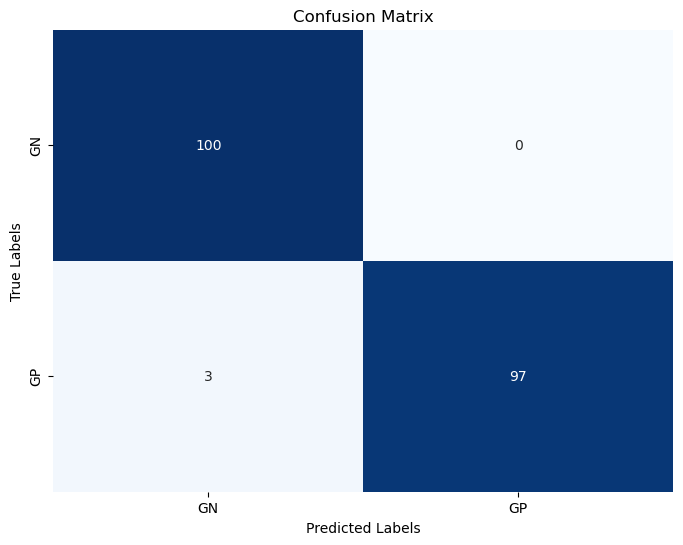

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Code to create the confusion matrix
true_labels = [item['input_image_uri'].split('/')[-2] for item in analysis_data]
predicted_labels = [item['predicted_label'] for item in analysis_data]

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap plot of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


The plot visually represents the accuracy score obtained by the Autopilot model.

The 3 misclassified images were filed under Gram positive images, but as discussed above, they may have been filed incorrectly

**Classification predictions with a probability of less than 0.9**

In [150]:
import pandas as pd
from IPython.display import display, HTML
import os

# Directory paths for images
input_image_directory = "images/"
heatmap_image_directory = "images/explainability/"

# Create a list to store the data
data_list = []

# Loop through the analysis data and add data to the list for misclassified images with a probability < 90
for item in analysis_data:
    true_label = item['input_image_uri'].split('/')[-2]  # Extract the true label
    predicted_label = item['predicted_label']
    probability = item['probability']
    
    input_img_no = item['input_image_uri'].split('/')[-1]
    heatmap_img_no = item['heatmap_image_uri'].split('/')[-1]

    # Check if the image is misclassified and probability is less than 90
    if probability < 0.9:
        # Define the local paths for the input and heatmap images
        input_image_path = os.path.join(input_image_directory, true_label, input_img_no)
        heatmap_image_path = os.path.join(heatmap_image_directory, heatmap_img_no)

        data_list.append([f'True Label: {true_label}', f'Predicted Label: {predicted_label}', f'Probability: {probability}',
                          f'<img src="{input_image_path}" width="400"/>', f'<img src="{heatmap_image_path}" width="400"/>'])

# Create a DataFrame from the data list
df = pd.DataFrame(data_list, columns=["True Label", "Predicted Label", "Probability", "Input Image", "Heatmap Image"])

# Display the DataFrame as an HTML table
display(HTML(df.to_html(escape=False)))


,True Label,Predicted Label,Probability,Input Image,Heatmap Image
0,True Label: GN,Predicted Label: GN,Probability: 0.8579467,,
1,True Label: GN,Predicted Label: GN,Probability: 0.7222333,,
2,True Label: GP,Predicted Label: GP,Probability: 0.8407826,,
3,True Label: GN,Predicted Label: GN,Probability: 0.8828326,,
4,True Label: GN,Predicted Label: GN,Probability: 0.82893884,,
5,True Label: GP,Predicted Label: GP,Probability: 0.6729231,,
6,True Label: GP,Predicted Label: GP,Probability: 0.53998405,,
7,True Label: GP,Predicted Label: GP,Probability: 0.53998405,,


Looking at the last two heat maps and comparing them with the input image, it really shows that the Autopilot model has very serious potential. These are terrible images (probably included intentially to increase the difficulty) and while the predicted probabilities are around 0.5, the model still predicted the labels correctly. I do wonder if the predictions are by chance or if the processing step is that good.

## Deploy Model

In [253]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/34/01/9d1460a6e71d6226e1f5c5053de20758c41100c5c15abb73551273a96fb8/streamlit-1.27.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/2a/4e62ff633612f746f88618852a626bbe24226eba5e7ac90e91dcfd6a414e/rich-13.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal<6,>=1.1 from https://files.pythonhosted.org/packages/1c/af/343114b3ed9500b46108b56569b31a3108d3669d4fd063d9640e2c36cd57/

In [266]:
import streamlit as st
import boto3
import json

def make_prediction(image_bytes):
    runtime = boto3.Session().client('sagemaker-runtime')
    response = runtime.invoke_endpoint(EndpointName='img-clsf',
                                       ContentType = 'application/x-image',
                                       Body=image_bytes)
    result = json.loads(response['Body'].read().decode())
    return result

st.title('Gram Stain Image Classifier')
uploaded_file = st.file_uploader('Choose an image to classify…', type = ['jpg', 'jpeg', 'png'])
if uploaded_file is not None:
    image_bytes = uploaded_file. Read()
    result = make_predictions(image_bytes)
    label = {result['predicted_label']}
    #st.write(f'Predicticted label: {result['predicted_label']}')
    #st.write(f'Probability: {result['probability']})
    if label == "GN":
        st.write("The Gram stain contains Gram negative bacteria")
        st.write(f"Probability: {result['probability']}")

    else:
        st.write("The Gram stain contains Gram positive bacteria")
        st.write(f"Probability: {result['probability']}")



In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.16.170.122:8501
  External URL: http://34.230.156.67:8501



In [269]:
def main():
    st.title('Gram Stain Image Classifier')
    uploaded_file = st.file_uploader('Choose an image to classify…', type = ['jpg', 'jpeg', 'png'])
    if uploaded_file is not None:
        image_bytes = uploaded_file. Read()
        result = make_predictions(image_bytes)
        label = {result['predicted_label']}
        #st.write(f'Predicticted label: {result['predicted_label']}')
        #st.write(f'Probability: {result['probability']})
        if label == "GN":
            st.write("The Gram stain contains Gram negative bacteria")
            st.write(f"Probability: {result['probability']}")

        else:
            st.write("The Gram stain contains Gram positive bacteria")
            st.write(f"Probability: {result['probability']}")

if __name__ == "__main__":
    main()

In [263]:
from flask import Flask, render_template, request
import boto3
import base64
import json

app = Flask(__name__)

# SageMaker endpoint name
endpoint_name = "Gram-Image-Classifier"

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded image from the request
    image = request.files['image']

    # Convert the image to base64
    image_data = base64.b64encode(image.read()).decode('utf-8')

    # Create a SageMaker runtime client
    runtime_client = boto3.client('sagemaker-runtime')

    # Make a request to the SageMaker endpoint
    response = runtime_client.invoke_endpoint(
        EndpointName=endpoint_name,
        ContentType='application/json',
        Body=json.dumps({'image': image_data})
    )

    # Parse the response
    result = json.loads(response['Body'].read().decode())

    # Get the predicted label from the response
    predicted_label = result['predictions'][0]['predicted_label']

    return render_template('result.html', predicted_label=predicted_label)

if __name__ == '__main__':
    app.run(debug=True, port=1805)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:1805
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in

SystemExit: 1

## Web application demonstrations